In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import pandas as pd

from pandas import Series,DataFrame

In [17]:
%%time
contb1 = pd.read_csv('contb_01.csv')
contb2 = pd.read_csv('contb_02.csv')
contb3 = pd.read_csv('contb_03.csv')

Wall time: 958 ms


In [18]:
# 數據合併
# https://www.youtube.com/watch?v=QzFJSxMc9Vw&list=PLwDQt7s1o9J65aQ6HYN4LaqRkX8ncKG1D&index=33
# 4:13

In [19]:
contb = pd.concat([contb1,contb2,contb3],axis=0) #合併

In [20]:
contb.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11


In [21]:
contb.shape
contb.info() #資訊

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cand_nm            1001733 non-null  object 
 1   contbr_nm          1001733 non-null  object 
 2   contbr_st          1001729 non-null  object 
 3   contbr_employer    988004 non-null   object 
 4   contbr_occupation  993303 non-null   object 
 5   contb_receipt_amt  1001733 non-null  float64
 6   contb_receipt_dt   1001733 non-null  object 
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


In [22]:
contb.describe()

,contb_receipt_amt
count,1.001733e+06
mean,2.982358e+02
std,3.749663e+03
min,-3.080000e+04
25%,3.500000e+01
50%,1.000000e+02
75%,2.500000e+02
max,2.014491e+06


In [23]:
#處裡空數據

In [24]:
cond = contb['contbr_employer'].isnull()

contb[cond]


,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
41,"Bachmann, Michelle","MINNIS, RITA",CA,NaN,NaN,-1500.0,20-JUN-11
264,"Bachmann, Michelle","BISHOP, GERARD",NY,NaN,NaN,-1700.0,28-JUN-11
752,"Romney, Mitt","KNIGHT, RENA",AL,NaN,NaN,-60.0,07-MAR-12
897,"Romney, Mitt",THE STEWART FIRM L.L.C.,AL,NaN,NaN,250.0,23-MAR-12
1033,"Romney, Mitt","SELLERS, LEE",AL,NaN,NaN,-120.0,20-JAN-12
...,...,...,...,...,...,...,...
1715,"Perry, Rick",TEXAS ENERGY L.L.C.,WY,NaN,NaN,250.0,30-SEP-11
1717,"Perry, Rick","HARDER, ROBERT",WY,NaN,RETIRED,100.0,12-NOV-11
1720,"Perry, Rick","HARDER, ROBERT",WY,NaN,RETIRED,100.0,01-OCT-11
1722,"Perry, Rick","HARDER, ROBERT",WY,NaN,RETIRED,100.0,29-OCT-11


In [25]:
contb['contbr_employer'].fillna('NOT PROVIDE',inplace=True) # 填補 `沒提供`

In [26]:
contb['contbr_occupation'].fillna('NOT PROVIDE',inplace=True) # 填補 `沒提供`

In [27]:
cond= contb['contbr_st'].isnull()

contb[cond]

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
453997,"Obama, Barack","NEWBURG, ANDRE",NaN,NOT EMPLOYED,RETIRED,1000.0,01-DEC-11
453998,"Obama, Barack","HARBARD, SONJA",NaN,SELF-EMPLOYED,WRITER,250.0,31-MAR-12
453999,"Obama, Barack","LAKIN-THOMAS, PATRICIA",NaN,YORK UNIVERSITY,UNIVERSITY PROFESSOR,300.0,31-MAR-12
454000,"Obama, Barack","MICHAEALS, MARNIN",NaN,BAKER & MCKENZIE ZURICH,ATTORNEY,250.0,31-MAR-12


In [28]:
contb['contbr_st'].fillna('NOT PROVIDE',inplace=True) # 填補 `沒提供`

In [29]:
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cand_nm            1001733 non-null  object 
 1   contbr_nm          1001733 non-null  object 
 2   contbr_st          1001733 non-null  object 
 3   contbr_employer    1001733 non-null  object 
 4   contbr_occupation  1001733 non-null  object 
 5   contb_receipt_amt  1001733 non-null  float64
 6   contb_receipt_dt   1001733 non-null  object 
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


In [30]:
#通過搜索引擎等途徑，獲取到每個總統候選人的所屬黨派，建立字典parties，候選人名字作為鍵，所屬黨派作為對應的值
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [31]:
contb.cand_nm.unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [32]:
contb.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11


In [33]:
%%time
#map可以傳遞字典 100萬數據 增加一列耗時67.1毫秒
contb['party'] = contb['cand_nm'].map(parties) # 根據字典傳遞數據

Wall time: 78.8 ms


In [34]:
contb.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11,Republican
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11,Republican


In [35]:
contb['party'].value_counts()

Democrat      593747
Republican    407986
Name: party, dtype: int64

In [36]:
contb.columns

Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'party'],
      dtype='object')

In [37]:
contb.groupby('party')['contb_receipt_amt'].sum()

party
Democrat      1.335028e+08
Republican    1.652498e+08
Name: contb_receipt_amt, dtype: float64

In [38]:
 grouped_occuption = contb.groupby(['contbr_occupation'])['contb_receipt_amt'].sum() # 找到捐款的職業區別

In [39]:
grouped_occuption.sort_values(ascending=False)[50:100]

contbr_occupation
REALTOR                                 534020.57
MARKETING                               530017.39
ENTREPRENEUR                            529044.14
EDUCATOR                                524286.16
CONTRACTOR                              520020.74
C.P.A.                                  509132.11
BUSINESS EXECUTIVE                      496522.62
MANAGING PARTNER                        488627.80
PSYCHOLOGIST                            486602.06
NONE                                    472908.14
ADMINISTRATOR                           469351.33
MANAGEMENT                              462618.82
VOLUNTEER                               448275.91
REAL ESTATE BROKER                      447555.29
ANALYST                                 444928.38
EXECUTIVE DIRECTOR                      442439.18
BUSINESSMAN                             424126.62
INSURANCE                               423838.68
PRIVATE INVESTOR                        414367.07
SCIENTIST                       

In [40]:
occupation = {'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDE',
             'INFORMATION REQUESTED':'NOT PROVIDE',
              'C.E.O':'CEO',
              'LAWYER':'ATTORNEY',
              'SELF':'SELF-EMPLOYED',
              'SELF EMPLOYED ':'SELF-EMPLOYED'}  #建立字典

In [41]:
f = lambda x : occupation.get(x,x)
contb['contbr_occupation'] = contb['contbr_occupation'].map(f)  #將字典中分類轉換成資料內職業的分類

In [42]:
grouped_occupation = contb.groupby(['contbr_occupation'])['contb_receipt_amt'].sum()
grouped_occupation.sort_values(ascending=False)[:50]

contbr_occupation
RETIRED                  48176647.00
NOT PROVIDE              28826632.53
ATTORNEY                 22008455.49
HOMEMAKER                17484807.65
PHYSICIAN                 7224044.40
PRESIDENT                 6347843.59
EXECUTIVE                 5273717.90
CONSULTANT                4932627.98
CEO                       3594443.20
OWNER                     3278488.16
INVESTOR                  3204481.92
ENGINEER                  2730527.43
SELF-EMPLOYED             2628341.10
PROFESSOR                 2458033.81
C.E.O.                    2433218.11
MANAGER                   2167571.47
REAL ESTATE               2110499.34
SALES                     1814901.82
NOT EMPLOYED              1752927.93
BUSINESS OWNER            1736511.73
TEACHER                   1709754.05
CHAIRMAN                  1691595.37
STUDENT                   1679435.28
FINANCE                   1664021.31
BANKER                    1462903.13
WRITER                    1303267.29
PARTNER             

In [43]:
contb.columns

Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'party'],
      dtype='object')

In [44]:
#按照公司進行統計、分類

In [45]:
employer = {'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDE',
            'INFORMATION REQUESTED':'NOT PROVIDE',
            'SELF':'SELF-EMPLOYED',
            'SELF EMPLOYED':'SELF-EMPLOYED'}

In [46]:

contb.groupby(['contbr_employer'])['contb_receipt_amt'].sum().sort_values(ascending = False).shape

(135651,)

In [47]:
f = lambda x : employer.get(x,x)
contb['contbr_employer'] = contb['contbr_employer'].map(f)  #將公司轉換成字典內容

In [48]:
contb.groupby(['contbr_employer'])['contb_receipt_amt'].sum().sort_values(ascending = False)[:50]

contbr_employer
RETIRED                                 41374333.67
SELF-EMPLOYED                           37483895.22
NOT PROVIDE                             31281997.76
HOMEMAKER                               14738524.86
NOT EMPLOYED                             8636809.43
NONE                                     3809582.99
STUDENT                                   957971.85
REQUESTED                                 894009.54
MORGAN STANLEY                            386129.40
UNEMPLOYED                                377088.31
INFORMATION REQUESTED (BEST EFFORTS)      340503.63
CREDIT SUISSE                             300740.90
VOLUNTEER                                 294118.02
MICROSOFT                                 286304.32
GOLDMAN SACH & CO.                        233250.00
US ARMY                                   230796.52
GOLDMAN SACHS                             205338.57
BANK OF AMERICA                           197408.93
IBM                                       197129

#### 2.3 数据筛选
赞助金额筛选

In [49]:
# 捐赠金额大于0
contb_ = contb[contb['contb_receipt_amt'] > 0]
contb_.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11,Republican
2,"Bachmann, Michelle","SMITH, LANIER",AL,NOT PROVIDE,NOT PROVIDE,250.0,05-JUL-11,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11,Republican


In [50]:
contb.shape

(1001733, 8)

In [51]:
contb_.shape

(991477, 8)

In [52]:
#查看各候選人獲得得贊助總金額

cand_nm_amt = contb_.groupby(['cand_nm'])['contb_receipt_amt'].sum().sort_values(ascending = False)
cand_nm_amt

cand_nm
Obama, Barack                     1.358776e+08
Romney, Mitt                      8.833591e+07
Paul, Ron                         2.100962e+07
Perry, Rick                       2.030675e+07
Gingrich, Newt                    1.283277e+07
Santorum, Rick                    1.104316e+07
Cain, Herman                      7.101082e+06
Pawlenty, Timothy                 6.004819e+06
Huntsman, Jon                     3.330373e+06
Bachmann, Michelle                2.711439e+06
Johnson, Gary Earl                5.669616e+05
Roemer, Charles E. 'Buddy' III    3.730099e+05
McCotter, Thaddeus G              3.903000e+04
Name: contb_receipt_amt, dtype: float64

<AxesSubplot:xlabel='cand_nm'>

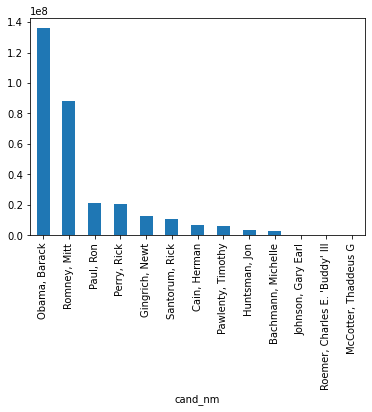

In [53]:
cand_nm_amt.plot(kind = 'bar')

<AxesSubplot:ylabel='contb_receipt_amt'>

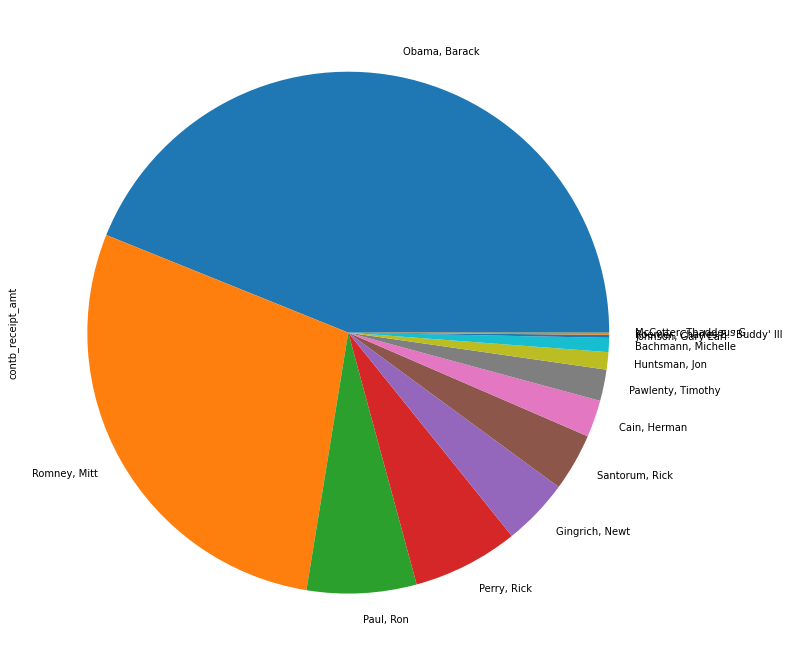

In [54]:
plt.figure(figsize=(12,12))
cand_nm_amt.plot(kind = 'pie')

In [55]:
#选取候选人为Obama、Romney的子集数据
#方式一

cond1 = contb_['cand_nm'] == 'Obama, Barack'
cond2 = contb_['cand_nm'] == 'Romney, Mitt'

cond = cond1|cond2   #條件 找尋Obama, Barack跟Romney, Mitt
contb_vs = contb_[cond]
contb_vs


,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican
...,...,...,...,...,...,...,...,...
201381,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,Democrat
201382,"Obama, Barack","TAITANO, TYRONE",ZZ,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,Democrat
201383,"Obama, Barack","TUCKER, PAMELA",ZZ,DODEA,EDUCATOR,3.0,20-JAN-12,Democrat
201384,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-APR-12,Democrat


In [56]:
#方式二
contb_vs2 = contb_.query("cand_nm == 'Obama, Barack' or cand_nm == 'Romney, Mitt'")
contb_vs2

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican
...,...,...,...,...,...,...,...,...
201381,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,Democrat
201382,"Obama, Barack","TAITANO, TYRONE",ZZ,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,Democrat
201383,"Obama, Barack","TUCKER, PAMELA",ZZ,DODEA,EDUCATOR,3.0,20-JAN-12,Democrat
201384,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-APR-12,Democrat


In [57]:
#方式三
cond = contb_['cand_nm'].isin(['Romney, Mitt','Obama, Barack'])
contb_vs3 = contb_[cond]
contb_vs3

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican
...,...,...,...,...,...,...,...,...
201381,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,Democrat
201382,"Obama, Barack","TAITANO, TYRONE",ZZ,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,Democrat
201383,"Obama, Barack","TUCKER, PAMELA",ZZ,DODEA,EDUCATOR,3.0,20-JAN-12,Democrat
201384,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-APR-12,Democrat


#### 2.4 面元化分析数据
接下来我们对该数据做另一种非常实用的分析，利用cut函数根据出资额大小将数据离散化到多个面元中

In [58]:
contb_.contb_receipt_amt.sort_values()

323688          0.01
327537          0.01
327468          0.01
326458          0.01
317091          0.01
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 991477, dtype: float64

In [59]:
contb_.contb_receipt_amt.unique().size

7326

In [60]:
#需要做範圍切分


In [61]:
contb_['contb_receipt_amt'].max()

2014490.51

In [62]:
bins = [0,1,10,100,1000,10000,100000,1000000,10000000]

In [63]:
labels = pd.cut(contb_['contb_receipt_amt'],bins)  # 切分
labels.sort_values(ascending=False)

labels.shape

(991477,)

In [64]:
labels = pd.cut(contb_vs['contb_receipt_amt'],bins)
labels.shape

(694283,)

### 3. 数据聚合与分组运算

#### 3.1 透视表(pivot_table)分析党派和职业

In [65]:
contb_.columns

Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'party'],
      dtype='object')

In [66]:
#按照党派、职业对赞助金额进行汇总，类似excel中的透视表操作，聚合函数为sum
#fill_value 填補0
ret = contb_.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc='sum',fill_value=0)  
ret

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,0.0
AREA VICE PRESIDENT,250.0,0.0
RESEARCH ASSOCIATE,100.0,0.0
TEACHER,500.0,0.0
THERAPIST,3900.0,0.0
...,...,...
ZOOKEEPER,35.0,0.0
ZOOLOGIST,400.0,0.0
ZOOLOGY EDUCATION,25.0,0.0


In [67]:
ret.sum(axis = 1).sort_values(ascending = False)[:20]

contbr_occupation
RETIRED           4.886656e+07
NOT PROVIDE       3.469680e+07
ATTORNEY          2.217088e+07
HOMEMAKER         1.788315e+07
PHYSICIAN         7.329445e+06
PRESIDENT         6.599434e+06
EXECUTIVE         5.494011e+06
CONSULTANT        5.004638e+06
CEO               3.715043e+06
OWNER             3.409854e+06
INVESTOR          3.315902e+06
ENGINEER          2.769899e+06
SELF-EMPLOYED     2.682894e+06
C.E.O.            2.594673e+06
PROFESSOR         2.461774e+06
MANAGER           2.207416e+06
REAL ESTATE       2.154804e+06
SALES             1.848352e+06
CHAIRMAN          1.792640e+06
BUSINESS OWNER    1.773322e+06
dtype: float64

In [68]:
ret['total'] = ret['Democrat'] + ret['Republican'] #總捐獻
ret


party,Democrat,Republican,total
contbr_occupation,,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,0.0,100.0
AREA VICE PRESIDENT,250.0,0.0,250.0
RESEARCH ASSOCIATE,100.0,0.0,100.0
TEACHER,500.0,0.0,500.0
THERAPIST,3900.0,0.0,3900.0
...,...,...,...
ZOOKEEPER,35.0,0.0,35.0
ZOOLOGIST,400.0,0.0,400.0
ZOOLOGY EDUCATION,25.0,0.0,25.0


In [69]:
ret.sort_values(by = 'total',ascending=False)

party,Democrat,Republican,total
contbr_occupation,,,
RETIRED,25305316.38,2.356124e+07,4.886656e+07
NOT PROVIDE,13725187.32,2.097161e+07,3.469680e+07
ATTORNEY,14302461.84,7.868419e+06,2.217088e+07
HOMEMAKER,4248875.80,1.363428e+07,1.788315e+07
PHYSICIAN,3735124.94,3.594320e+06,7.329445e+06
...,...,...,...
POLICY/ LAWYER,3.00,0.000000e+00,3.000000e+00
AFFORDABLE REAL ESTATE DEVELOPER,0.00,3.000000e+00,3.000000e+00
ADMINISTRATION/INSTRUCTOR,3.00,0.000000e+00,3.000000e+00


In [70]:
#过滤掉赞助金额小于200W的数据

cond = ret['total'] < 2000000

index = ret[cond].index

ret_big = ret.drop(labels=index)

# 绘制献金前20数据
ret_big.shape

(17, 3)

<AxesSubplot:xlabel='contbr_occupation'>

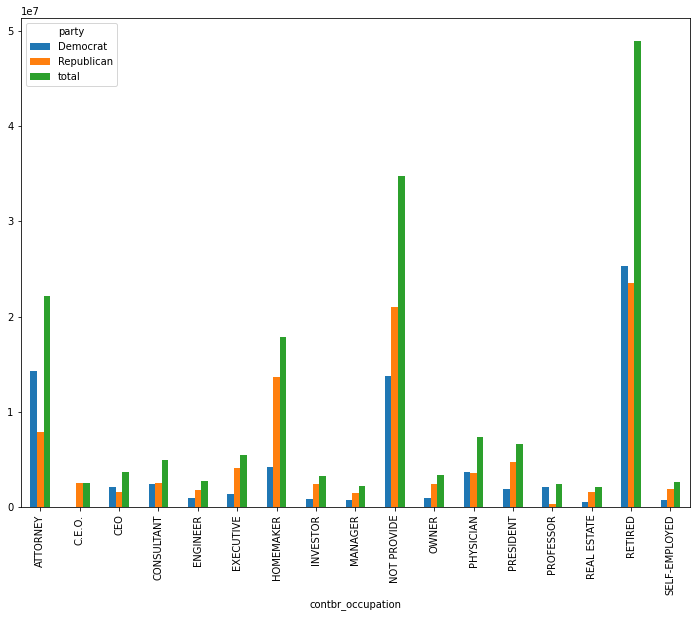

In [71]:
#繪圖
plt.figure(figsize=(12,9))
ax = plt.subplot(1,1,1)
ret_big.plot(kind = 'bar',ax = ax)

#### 3.2 分组级运算和转换
根据职业与雇主信息分组运算

In [72]:
#由于职业和雇主的处理非常相似，我们定义函数get_top_amounts()对两个字段进行分析处理

#每一個候選人前七個捐款職業
def get_top_amounts(grouped,key,n):
#     !!!先分组，grouped，然后继续再分
    return grouped.groupby(key)['contb_receipt_amt'].sum().sort_values(ascending = False)[:n]

grouped = contb_.groupby('cand_nm')

grouped.apply(get_top_amounts,'contbr_occupation',7)


cand_nm             contbr_occupation                   
Bachmann, Michelle  RETIRED                                 854785.17
                    NOT PROVIDE                             167705.00
                    HOMEMAKER                               105622.00
                    PHYSICIAN                                77319.00
                    PRESIDENT                                68831.00
                                                              ...    
Santorum, Rick      NOT PROVIDE                             968723.54
                    INFORMATION REQUESTED (BEST EFFORTS)    328323.63
                    PHYSICIAN                               314755.19
                    ATTORNEY                                293465.58
                    EXECUTIVE                               254517.55
Name: contb_receipt_amt, Length: 91, dtype: float64

In [73]:
#找尋歐把馬跟Romney
grouped = contb_vs.groupby('cand_nm')
# unstack 行變成列
grouped.apply(get_top_amounts,'contbr_occupation',7).unstack(level = 0)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_occupation,,
ATTORNEY,14302461.84,5372424.02
C.E.O.,NaN,1968386.11
CONSULTANT,2459912.71,NaN
EXECUTIVE,NaN,2300947.03
HOMEMAKER,4248875.80,8147446.22
NOT PROVIDE,13725187.32,11638509.84
PHYSICIAN,3735124.94,NaN
PRESIDENT,NaN,2491244.89
PROFESSOR,2165071.08,NaN


从数据可以看出，Obama更受精英群体（律师、医生、咨询顾问）的欢迎，Romney则得到更多企业家或企业高管的支持

In [74]:
#同样的，使用get_top_amounts()对雇主进行分析处理
grouped.apply(get_top_amounts,'contbr_employer',10)

cand_nm        contbr_employer   
Obama, Barack  RETIRED               22694558.85
               SELF-EMPLOYED         18626807.16
               NOT PROVIDE           13883494.03
               NOT EMPLOYED           8586308.70
               HOMEMAKER              2605408.54
               STUDENT                 318831.45
               VOLUNTEER               257104.00
               MICROSOFT               215585.36
               SIDLEY AUSTIN LLP       168254.00
               REFUSED                 149516.07
Romney, Mitt   NOT PROVIDE           12321731.24
               RETIRED               11506225.71
               HOMEMAKER              8147196.22
               SELF-EMPLOYED          7414115.22
               STUDENT                 496490.94
               CREDIT SUISSE           281150.00
               MORGAN STANLEY          267266.00
               GOLDMAN SACH & CO.      238250.00
               BARCLAYS CAPITAL        162750.00
               H.I.G. CAPITAL      

Obama：微软、盛德国际律师事务所； Romney：瑞士瑞信银行、摩根斯坦利、高盛公司、巴克莱资本、H.I.G.资本

对赞助金额进行分组分析(matplotlib画图)

前面我们已经利用pd.cut()函数，根据出资额大小将数据离散化到多个面元中，接下来我们就要对每个离散化的面元进行分组分析

首先统计各出资区间的赞助笔数，这里用到unstack()，stack()函数是堆叠，unstack()函数就是不要堆叠，即把多层索引变为表格数据

接下来，我们再统计各区间的赞助金额

In [75]:
contb_vs.groupby(['cand_nm'])['contb_receipt_amt'].sum()

cand_nm
Obama, Barack    1.358776e+08
Romney, Mitt     8.833591e+07
Name: contb_receipt_amt, dtype: float64

In [76]:
contb_vs.groupby(['cand_nm',labels]).size().unstack(level = 0,fill_value = 0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153992,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [77]:
#绘制Obama、Romney各区间赞助总金额
amt_vs = contb_vs.groupby(['cand_nm',labels]).sum().unstack(level = 0,fill_value = 0)
amt_vs.fillna(0,inplace=True)

<AxesSubplot:xlabel='contb_receipt_amt'>

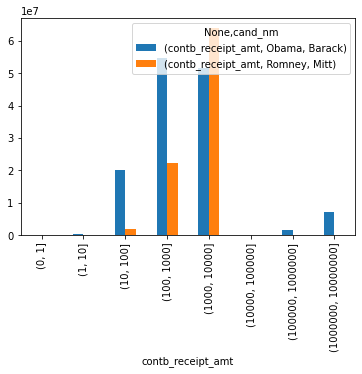

In [78]:
amt_vs.plot(kind = 'bar')

In [79]:
cond = contb_vs.contb_receipt_amt > 100000 #大於100000

contb_vs[cond]

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
257270,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,DC,NOT PROVIDE,NOT PROVIDE,451726.00,30-JUN-11,Democrat
319478,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDE,NOT PROVIDE,526246.17,30-APR-12,Democrat
325136,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDE,NOT PROVIDE,2014490.51,29-FEB-12,Democrat
326651,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDE,NOT PROVIDE,1944042.43,31-DEC-11,Democrat
335187,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDE,NOT PROVIDE,512710.91,31-JAN-12,Democrat
344419,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDE,NOT PROVIDE,1511192.17,30-SEP-11,Democrat
344539,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDE,NOT PROVIDE,1679114.65,31-MAR-12,Democrat


<AxesSubplot:xlabel='contb_receipt_amt'>

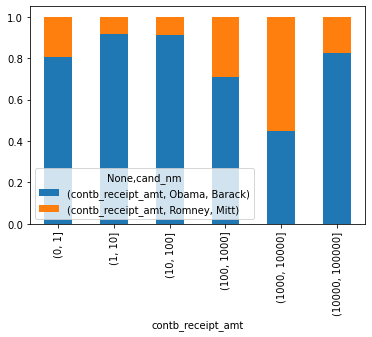

In [80]:
#算出每个区间两位候选人收到赞助总金额的占比
# 百分比堆积图

#  div  ???

# stacked 堆積

amt_vs.div(amt_vs.sum(axis = 1),axis = 0)[:-2].plot(kind = 'bar',stacked = True)

### 4.时间处理
#### 4.1 str转datetime

In [81]:
contb_vs.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican


In [82]:
contb_vs.dtypes

cand_nm               object
contbr_nm             object
contbr_st             object
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
party                 object
dtype: object

In [83]:
contb_vs['contb_receipt_dt'] = pd.to_datetime(contb_vs['contb_receipt_dt']) #轉換成時間

<ipython-input-83-3d7b4ee363ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contb_vs['contb_receipt_dt'] = pd.to_datetime(contb_vs['contb_receipt_dt']) #轉換成時間


In [84]:
contb_vs.dtypes


cand_nm                      object
contbr_nm                    object
contbr_st                    object
contbr_employer              object
contbr_occupation            object
contb_receipt_amt           float64
contb_receipt_dt     datetime64[ns]
party                        object
dtype: object

In [85]:
contb_vs.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,2012-02-01,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,2012-02-01,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,2012-04-13,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,2011-08-21,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,2012-03-07,Republican


#### 4.2 以时间作为索引

In [86]:
contb_vs_time = contb_vs.set_index('contb_receipt_dt')
contb_vs_time.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,party
contb_receipt_dt,,,,,,,
2012-02-01,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,Republican
2012-02-01,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,Republican
2012-04-13,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,Republican
2011-08-21,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,Republican
2012-03-07,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,Republican


#### 4.3重采样和频度转换

重采样（Resampling）指的是把时间序列的频度变为另一个频度的过程。

把高频度的数据变为低频度叫做降采样（downsampling），

resample会对数据进行分组，然后再调用聚合函数。

这里我们把频率从每日转换为每月，属于高频转低频的降采样

In [87]:
# 行索引是时间，那么我们就可以实现重采样
# resample 可以設定M 月'D 天'Y 年
vs_m = contb_vs_time.groupby(['cand_nm']).resample('M')['contb_receipt_amt'].sum().unstack(level = 0)

In [88]:
vs_m

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_dt,,
2011-04-30,8246635.79,2035593.13
2011-05-31,6570013.79,6856580.13
2011-06-30,12159624.88,8392452.25
2011-07-31,3557892.31,2374182.25
2011-08-31,4685825.79,2411347.24
2011-09-30,15304567.88,7522271.56
2011-10-31,5945068.04,3640163.93
2011-11-30,5194383.31,7006165.25
2011-12-31,13571341.82,11415258.46


<AxesSubplot:xlabel='contb_receipt_dt'>

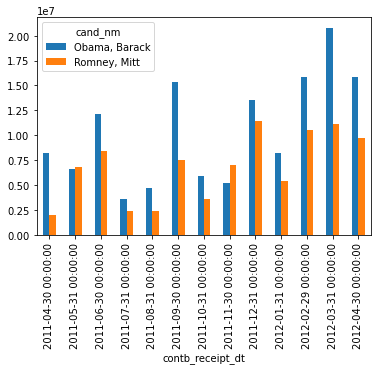

In [89]:
# 我们用面积图把11年4月-12年4月两位总统候选人接受的赞助笔数做个对比可以看出，
# 越临近竞选，大家赞助的热情越高涨，奥巴马在各个时段都占据绝对的优势
vs_m.plot(kind = 'bar')

<AxesSubplot:xlabel='contb_receipt_dt'>

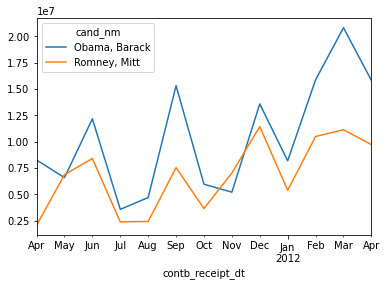

In [90]:
vs_m.plot(kind = 'line')

<AxesSubplot:xlabel='contb_receipt_dt'>

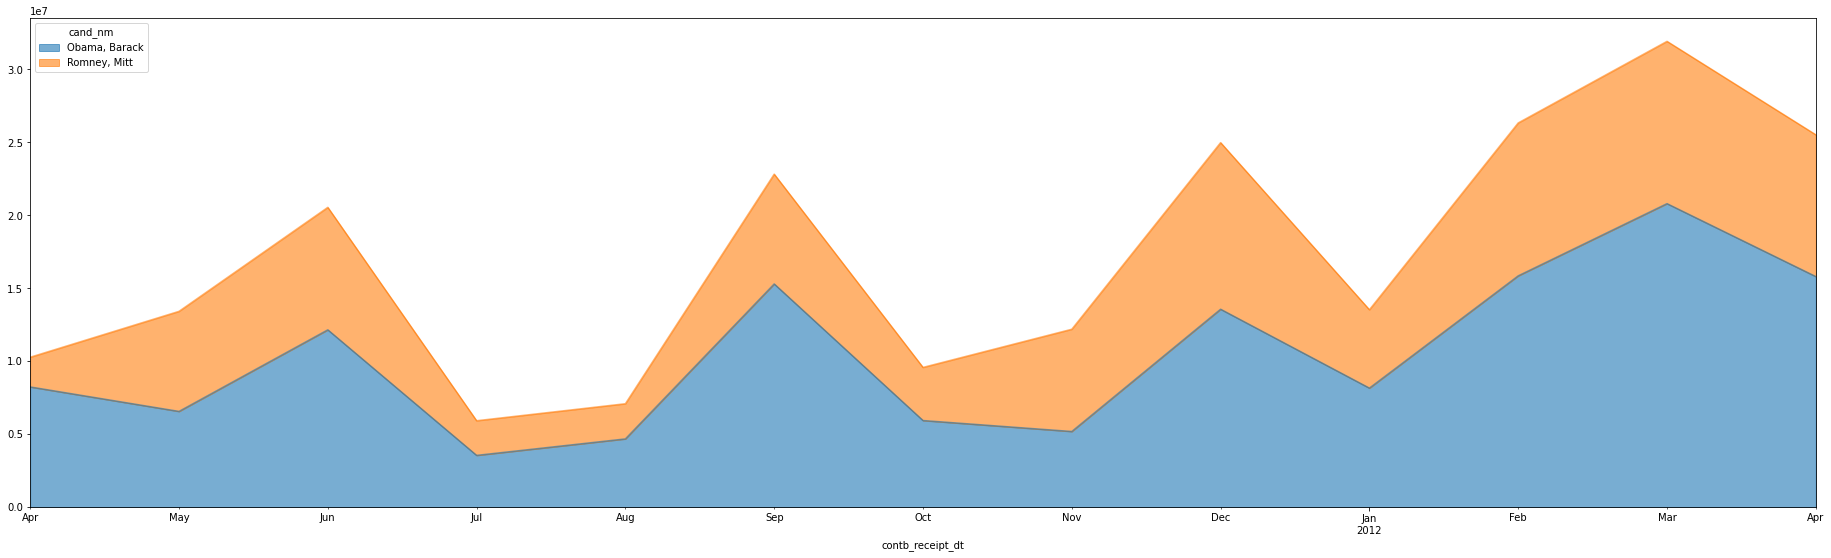

In [91]:
plt.figure(figsize=(32,9))
ax = plt.subplot(1,1,1)
vs_m.plot(kind = 'area',ax = ax,alpha = 0.6)

In [93]:
#重採樣必須是時間序列
#改變數據頻率 所以報錯
#contb_vs.groupby(['cand_nm']).resample('M')['contb_receipt_amt'].sum()

各州支持率

In [94]:
contb_vs.columns

Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'party'],
      dtype='object')

In [95]:
#依据州和候选人进行分组
state_vs = contb_vs.groupby(['cand_nm','contbr_st'])['contb_receipt_amt'].sum().unstack(level = 0)
state_vs

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,56405.00,135.00
AB,2048.00,NaN
AE,42973.75,5680.00
AK,281840.15,86204.24
AL,543123.48,527303.51
...,...,...
WI,1130155.46,270316.32
WV,169154.47,126725.12
WY,194046.74,252595.84


In [96]:
state_vs.fillna(0,inplace=True)

<AxesSubplot:xlabel='contbr_st'>

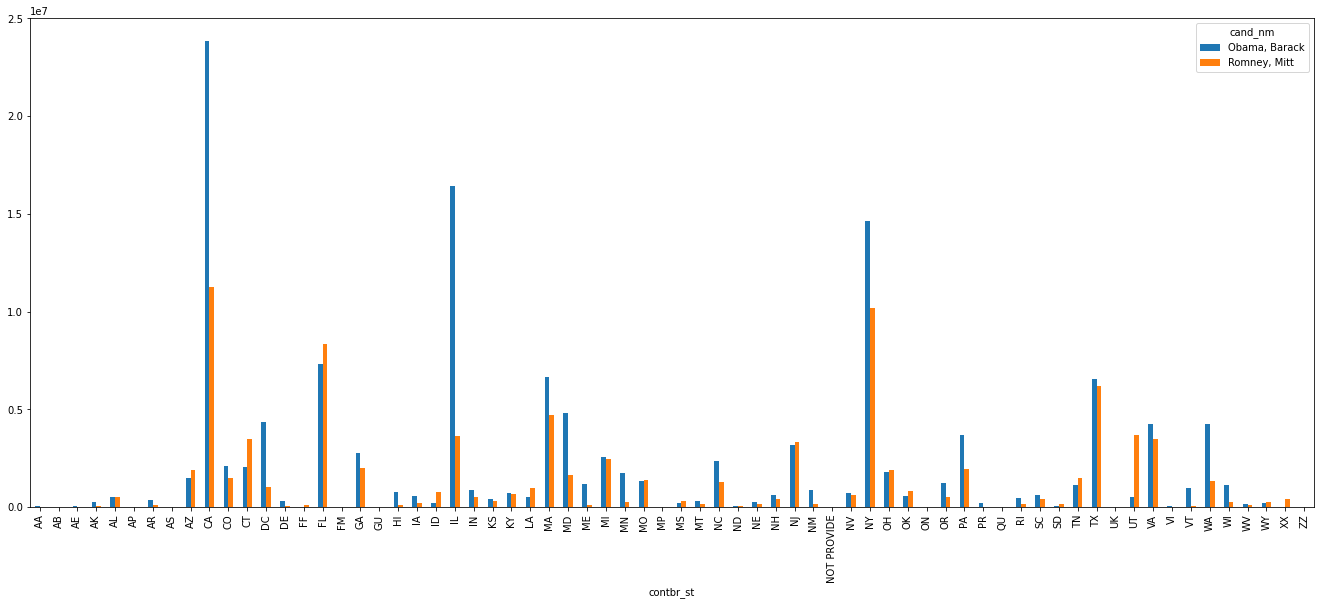

In [97]:
#繪圖
plt.figure(figsize=(23,9))

ax = plt.subplot(1,1,1)

state_vs.plot(kind = 'bar',ax = ax)

In [98]:
#比例
state_vs_rate = state_vs.div(state_vs.sum(axis = 1),axis = 0)
state_vs_rate

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,0.997612,0.002388
AB,1.000000,0.000000
AE,0.883257,0.116743
AK,0.765778,0.234222
AL,0.507390,0.492610
...,...,...
WI,0.806982,0.193018
WV,0.571700,0.428300
WY,0.434456,0.565544


In [99]:
##刪除不存在的洲
state_vs_rate.drop(labels=['AA','AB','AE','NOT PROVIDE'],inplace = True)
state_vs_rate

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AP,0.957329,0.042671
AR,0.772902,0.227098
AS,1.000000,0.000000
...,...,...
WI,0.806982,0.193018
WV,0.571700,0.428300
WY,0.434456,0.565544


In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap

In [101]:
## 州全称对应缩写缩写
abbr = {'Commonwealth of Kentucky':'KY','Commonwealth of Massachusetts':'MA','Commonwealth of Pennsylvania':'PA',
        'State of Rhode Island and Providence Plantations':'RI'}

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap

In [119]:
from matplotlib.patches import Polygon
# hex16进制表示的颜色
from matplotlib.colors import rgb2hex

In [120]:
#cmap = plt.cm.Reds

#for i in range(10):
#    plt.plot(np.arange(10) + i,c = cmap((i+1)/10))

In [121]:
oba = state_vs_rate['Obama, Barack']
oba

contbr_st
AK    0.765778
AL    0.507390
AP    0.957329
AR    0.772902
AS    1.000000
        ...   
WI    0.806982
WV    0.571700
WY    0.434456
XX    0.000000
ZZ    1.000000
Name: Obama, Barack, Length: 64, dtype: float64

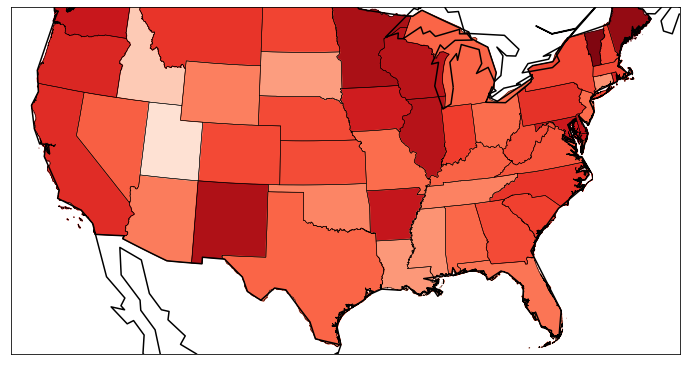

In [122]:
'''llcrnrlon	所需地图域（度）的左下角经度。
llcrnrlat	所需地图域左下角的纬度（度）。
urcrnrlon	所需地图域（度）的右上角经度。
urcrnrlat	所需地图域右上角的纬度（度）。
'''

plt.figure(figsize=(12,9))
# lat_1 or lat_0 and lon_0
m = Basemap(llcrnrlon = -122,
           llcrnrlat = 23.41,
           urcrnrlon = -64,
           urcrnrlat = 45,
           projection = 'lcc',
            lat_1 =30, #所需地圖中心
            lon_0 = -100 #所需地圖中心
            )

m.drawcoastlines(linewidth=1.5) #海岸線
m.drawcountries(linewidth = 1.5) #城市
#m.drawstates()

# 地图读取了美国地图形状，m中就有各州的形状，数据
m.readshapefile('./USA/gadm36_USA_1',name = 'states')



colors = []
states = []

cmap = plt.cm.Reds

for shapeinfo in m.states_info:
    a = shapeinfo['VARNAME_1']   #     州的缩写
    s = a.split('|')[0]          # 原本為AK|Alaska 取前面
    
    #可以代表颜色
    try:
        rate = oba[s]
    
        colors.append(cmap(rate))
        states.append(s)
    except:
        colors.append(cmap(oba[abbr[s]]))  #出錯就給默認顏色
        states.append(s)
    
# 州填充颜色
# seg州中的一部分区域，多边形
ax = plt.gca()
for n,seg in enumerate(m.states):
    c = rgb2hex(colors[n])
    poly = Polygon(seg,color = c )
    ax.add_patch(poly)





plt.show()


